In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
# loading the data
df = pd.read_csv("irises.csv", sep="|")

In [3]:
df.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
1,5.1,3.5,1.4,0.2,setosa
2,4.9,3.0,1.4,0.2,setosa
3,4.7,3.2,1.3,0.2,setosa
4,4.6,3.1,1.5,0.2,setosa
5,5.0,3.6,1.4,0.2,setosa


In [4]:
# cleaning time!
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150 entries, 1 to 150
Data columns (total 5 columns):
Sepal.Length    150 non-null float64
Sepal.Width     149 non-null float64
Petal.Length    150 non-null float64
Petal.Width     150 non-null object
Species         150 non-null object
dtypes: float64(3), object(2)
memory usage: 7.0+ KB


In [5]:
# let's investigate why Petal.Width isn't numeric and adjust its data type
df["Petal.Width"].unique()

array(['0.2', '0.4', '0.3', '0.1', '0.5', '0.6', '1.4', '1.5', '1.3',
       '1.6', '1', '1.1', '1.8', '1.2', '1.7', '2.5', '1.9', '2.1', '2.2',
       '2', '2.4', '2.3', '2,2'], dtype=object)

In [6]:
df["Petal.Width"] = pd.to_numeric(df["Petal.Width"].str.replace(",", "."))

In [7]:
# now everything's fine
df.dtypes

Sepal.Length    float64
Sepal.Width     float64
Petal.Length    float64
Petal.Width     float64
Species          object
dtype: object

In [8]:
# one missing value for Sepal.Width and negative value for Sepal.Length which doesn't make any sense
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,149.000000,150.000000,150.000000
mean,5.779333,3.061745,3.758000,1.199333
std,1.197721,0.433963,1.765298,0.762238
min,-4.800000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
# let's check which of the species is the missing value and replace it with the mean of its class
df[df["Sepal.Width"].isnull()]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
82,5.5,NaN,3.7,1.0,versicolor


In [10]:
df['Sepal.Width'].fillna(df["Sepal.Width"][df["Species"] == "versicolor"].mean(), inplace=True)

In [11]:
# let's check which of the species has negative Sepal.Length and replace it with the mean of its class
df[df["Sepal.Length"] < 0]

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
25,-4.8,3.4,1.9,0.2,setosa


In [12]:
non_negative_setosa = df["Sepal.Length"][df["Sepal.Length"] > 0][df["Species"] == "setosa"]
df["Sepal.Length"][df["Sepal.Length"] < 0] = non_negative_setosa.mean()

C:\Users\Alicja Kocieniewska\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [13]:
# now everything seems fine
df.describe()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.844735,3.059850,3.758000,1.199333
std,0.826465,0.433126,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


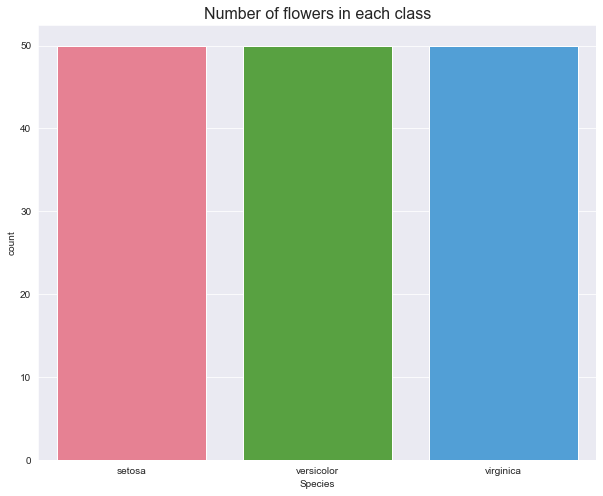

In [55]:
# some basic exploration - our dataset is balanced
sns.set_style("darkgrid")
plt.figure(figsize=(10, 8))
sns.countplot(x="Species", data=df, palette="husl").set_title(
    "Number of flowers in each class", 
    fontsize=16)
plt.savefig("plot1.png")

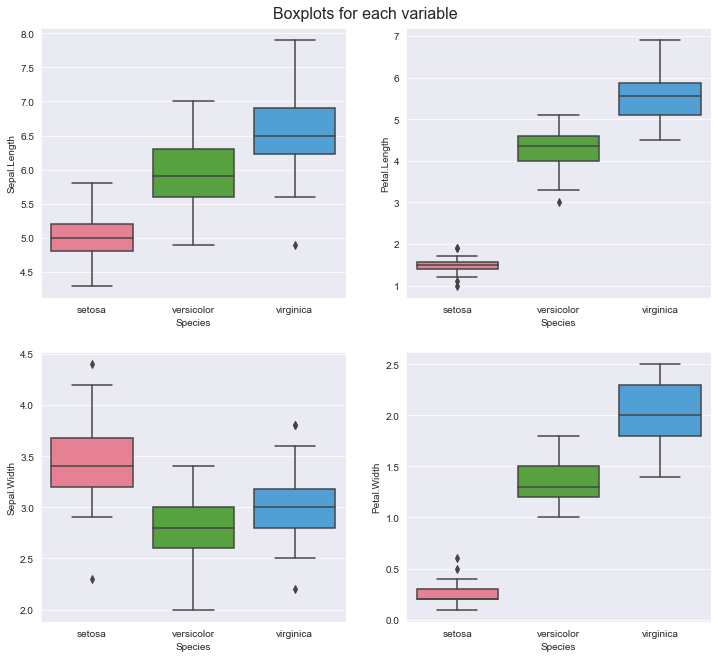

In [60]:
plt.figure(figsize=(12,10)).suptitle("Boxplots for each variable", fontsize=16)
plt.subplots_adjust(top=0.95)
plt.subplot(2,2,1)
sns.boxplot(x="Species",y="Sepal.Length",data=df, palette="husl")
plt.subplot(2,2,2)
sns.boxplot(x="Species",y="Petal.Length",data=df, palette="husl")
plt.subplot(2,2,3)
sns.boxplot(x="Species",y="Sepal.Width",data=df, palette="husl")
plt.subplot(2,2,4)
sns.boxplot(x="Species",y="Petal.Width",data=df, palette="husl")
plt.savefig("plot2.png")

In [ ]:
# more of distributions analysis - warnings can be ignored for now
sns.pairplot(df, hue="Species", palette="husl")
plt.subplots_adjust(top=0.95)
plt.suptitle("Distribution analysis", 
             size = 16)
plt.savefig("plot3.png")